**Aim:** Some sort of plot showing the growth phenotypes for PRDX1-6 from DepMap?

In [5]:
!pip install PyCanDI && candi-install

Manager Path: /Users/abearab/miniconda3/envs/screenpro2/lib/python3.11/site-packages/CanDI/setup
Config Path: /Users/abearab/miniconda3/envs/screenpro2/lib/python3.11/site-packages/CanDI/setup/data/config.ini
Found local copy...
Found local copy...
Found local copy...
Found local copy...
Found local copy...
Found local copy...
Found local copy...
Found local copy...
Found local copy...
Writing config file


In [6]:
from CanDI import candi as can

In [23]:
pan_cancer = can.CellLineCluster(can.data.cell_lines.index.to_list())

In [139]:
pan_cancer.effect_of

<bound method Entity.essential of <CanDI.candi.candi.CellLineCluster object at 0x105198e90>>

In [149]:
obj = pan_cancer

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

# from IPython.display import set_matplotlib_formats
# set_matplotlib_formats('svg')
sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})

In [151]:
def plot_gene_effect_dependency_PRDXs(obj):
    PRDXs_dep = obj.dependency_of(['PRDX'+str(n) for n in range(1, 7)])
    PRDXs_eff = obj.effect_of(['PRDX'+str(n) for n in range(1, 7)])

    # violion plot
    fig, (ax, bx) = plt.subplots(1, 2, figsize=(10, 4))

    sns.violinplot(data=PRDXs_eff.T, scale='width', ax=ax)
    ax.set_ylabel('Gene Effect')
    ax.set_xlabel('')

    sns.violinplot(data=PRDXs_dep.T, scale='width', ax=bx)
    bx.set_ylabel('Gene Dependency')
    bx.set_xlabel('')

    plt.show()

In [158]:
mut_p53_df = can.data.mutations.query('gene == "TP53"').drop(columns=[
    'Entrez_Gene_Id','NCBI_Build','Chromosome','Start_position','End_position', 'Strand',
    'CGA_WES_AC','HC_AC','RD_AC','RNAseq_AC','SangerWES_AC','WGS_AC','ExAC_AF',
    'COSMIChsCnt','TCGAhsCnt','dbSNP_Val_Status'
])

In [159]:
p53_mut = can.CellLineCluster(list(mut_p53_df.DepMap_ID.unique()))

/var/folders/2l/9947v345357ch7g4kkxgcbjr0000gp/T/ipykernel_54464/2835339434.py:8: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=PRDXs_eff.T, scale='width', ax=ax)
/var/folders/2l/9947v345357ch7g4kkxgcbjr0000gp/T/ipykernel_54464/2835339434.py:12: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=PRDXs_dep.T, scale='width', ax=bx)


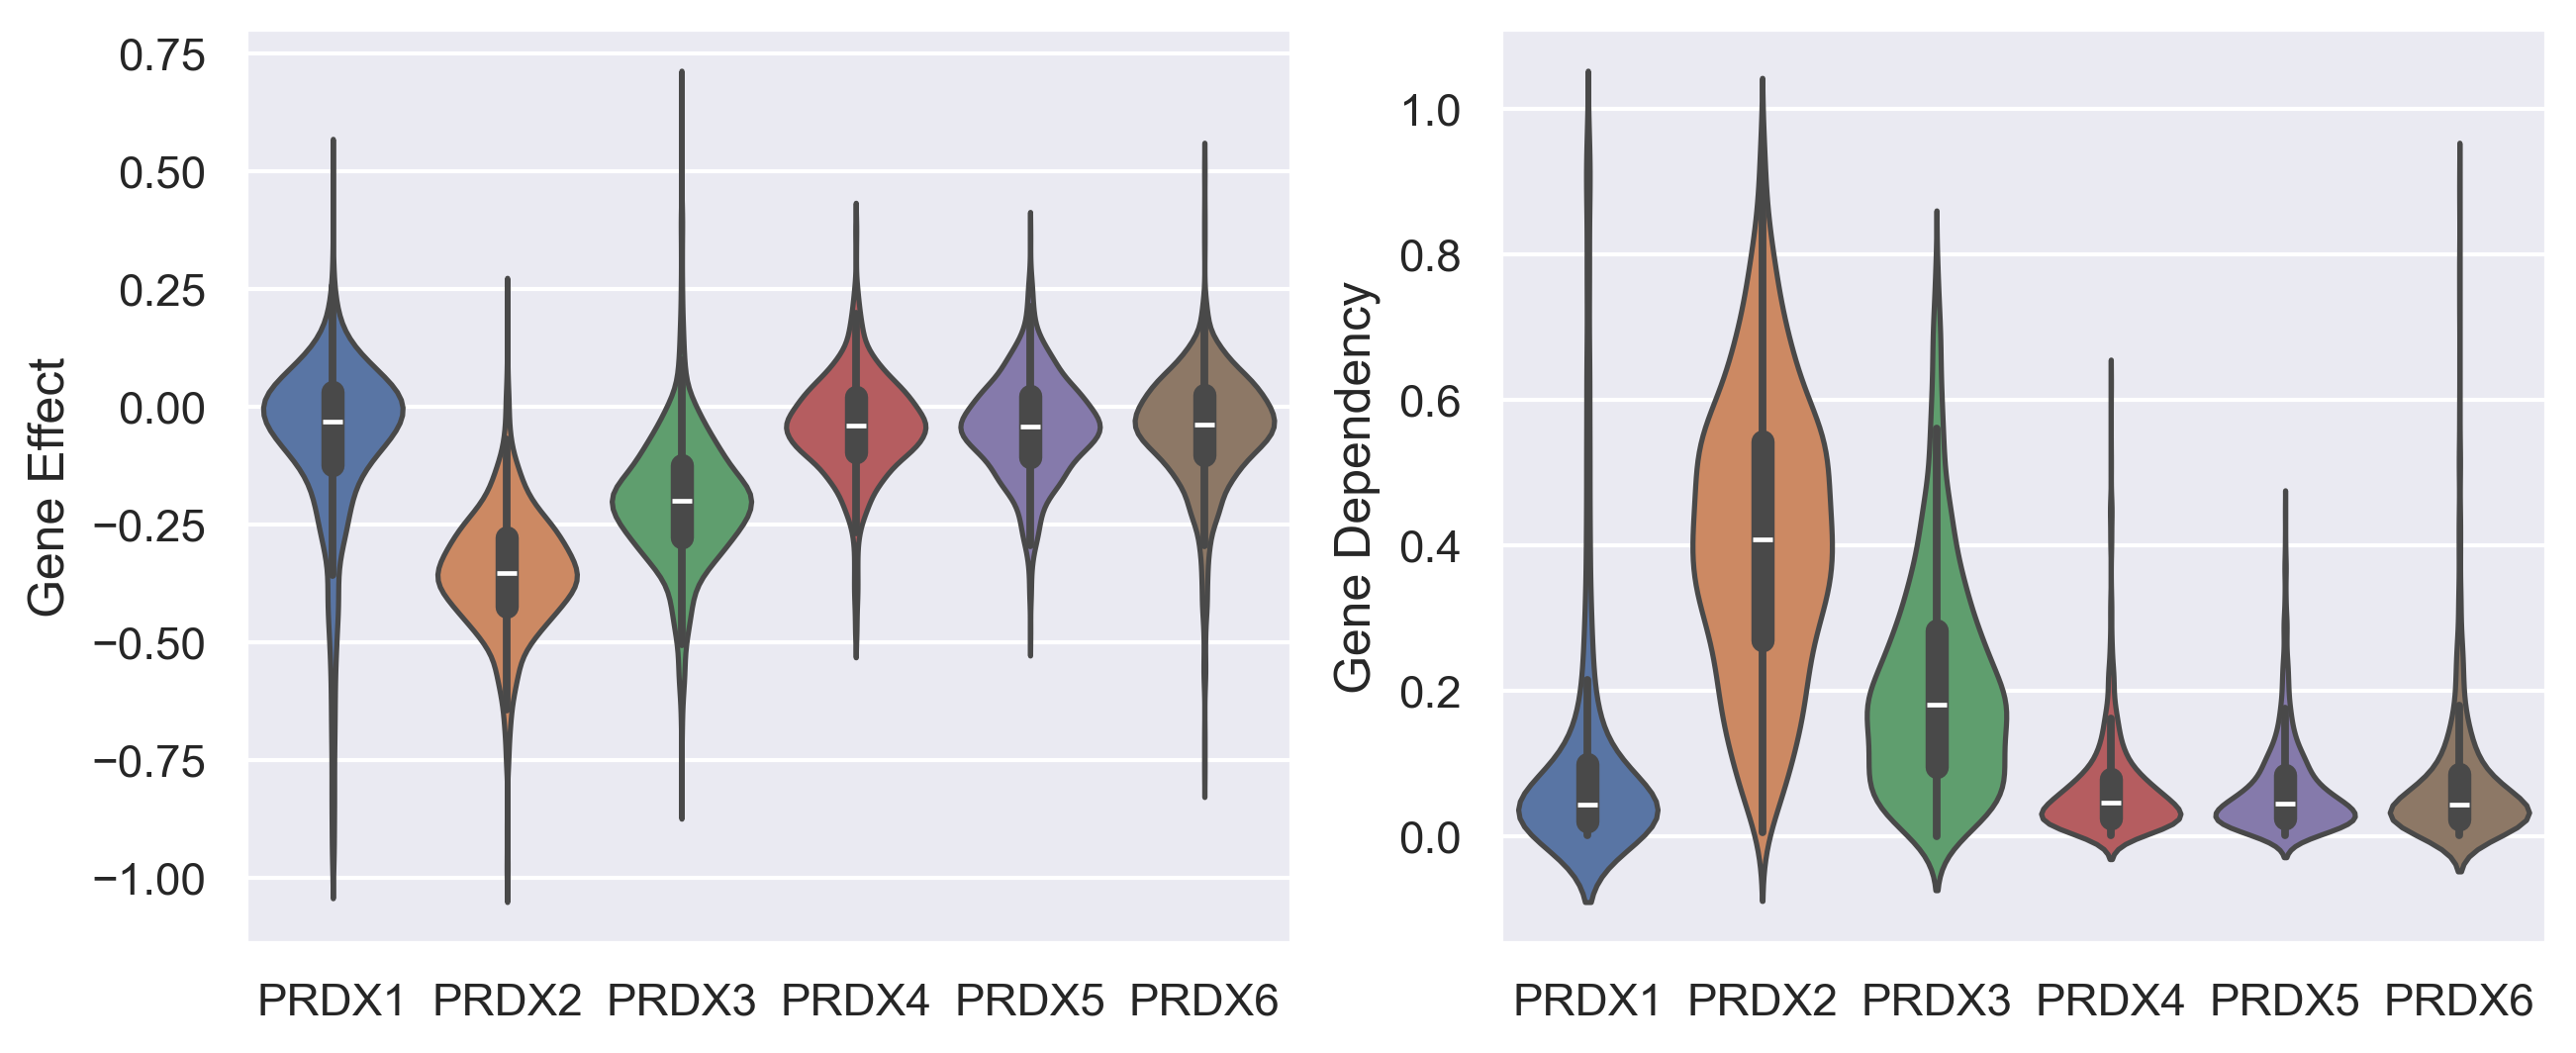

In [ ]:
plot_gene_effect_dependency_PRDXs(pan_cancer)

In [173]:
# plot_gene_effect_dependency_PRDXs(p53_mut)
# plot_gene_effect_dependency_PRDXs(can.CellLineCluster(pan_cancer.mutated('PTEN')))